# FIFA Clustering
This notebook is part of a lecture "Cluster Analysis in Python", via [datacamp](https://learn.datacamp.com/courses/cluster-analysis-in-python?embedded=true#!)


FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset we will analyze contains data on the 1000 top individual players in the game. We will explore various features of the data. 

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset and put into a dataframe named fifa
fifa = pd.read_csv('./data/fifa_18_sample_data.csv')

In [3]:
# Review basic information
fifa.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

In [4]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 816.5+ KB


### FIFA 18: Normalize data

Our analysis starts with two columns, ```eur_wage```, the wage of a player in Euros and ```eur_value```, their current transfer market value.

We will normalize the data and plot it

In [6]:
# Import dependencies
from scipy.cluster.vq import whiten

In [7]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

<AxesSubplot:xlabel='scaled_wage', ylabel='scaled_value'>

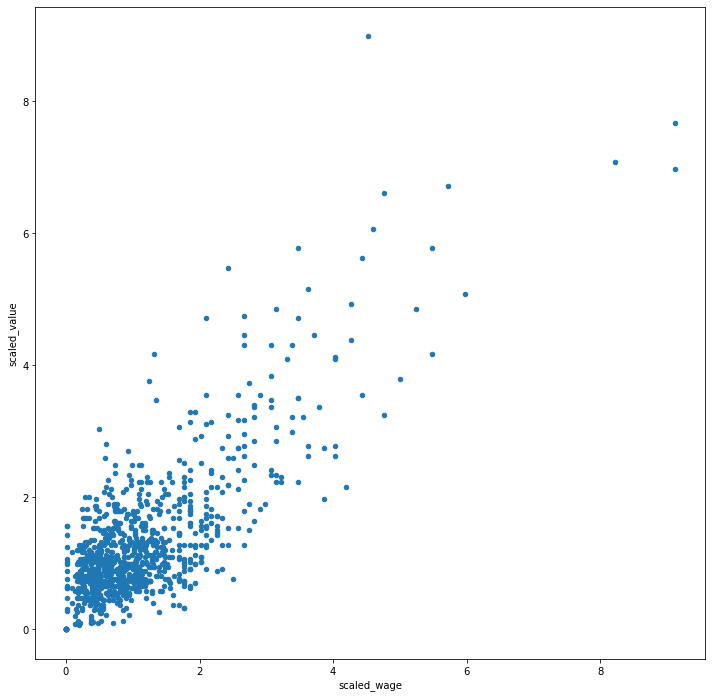

In [8]:
# Plot the two columns in a scatter plot
fig, ax = plt.subplots(figsize=(12,12))
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter', ax=ax)

In [9]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


As we expect the scaled values have a standard deviation of 1

## Explore defenders using clustering

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. We will perform clustering based on these attributes in the data.

In [10]:
# Import dependencies
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [11]:
# Scale sliding_tackle and aggression columns
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [12]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

In [13]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [14]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


<AxesSubplot:xlabel='scaled_sliding_tackle', ylabel='scaled_aggression'>

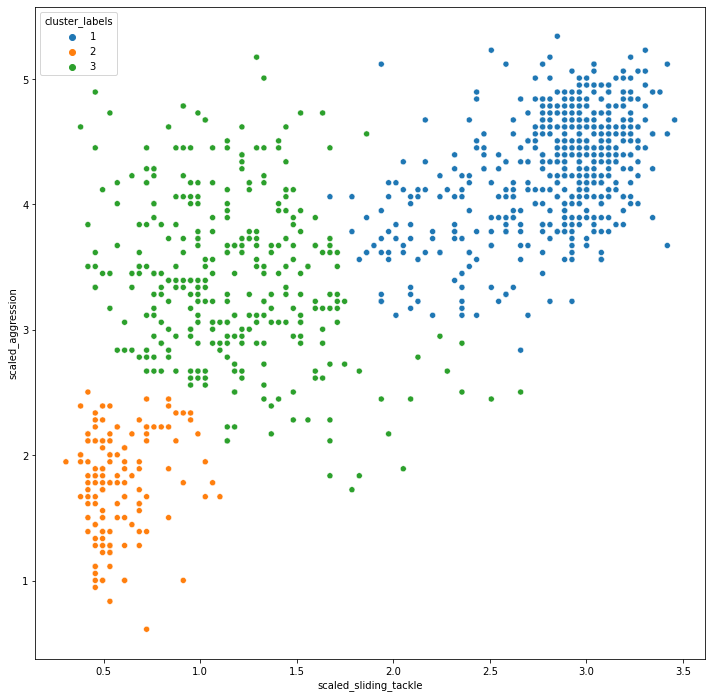

In [15]:
# Create a scatter plot through seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa, palette='tab10')

## Use k-means to cluster

In [16]:
# Import dependencies
from scipy.cluster.vq import kmeans, vq

In [17]:
# Generate cluster centers and labels
cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle','scaled_aggression']], 3)
fifa['cluster_labels'], _ = vq(fifa[['scaled_sliding_tackle','scaled_aggression']], cluster_centers)

<AxesSubplot:xlabel='scaled_sliding_tackle', ylabel='scaled_aggression'>

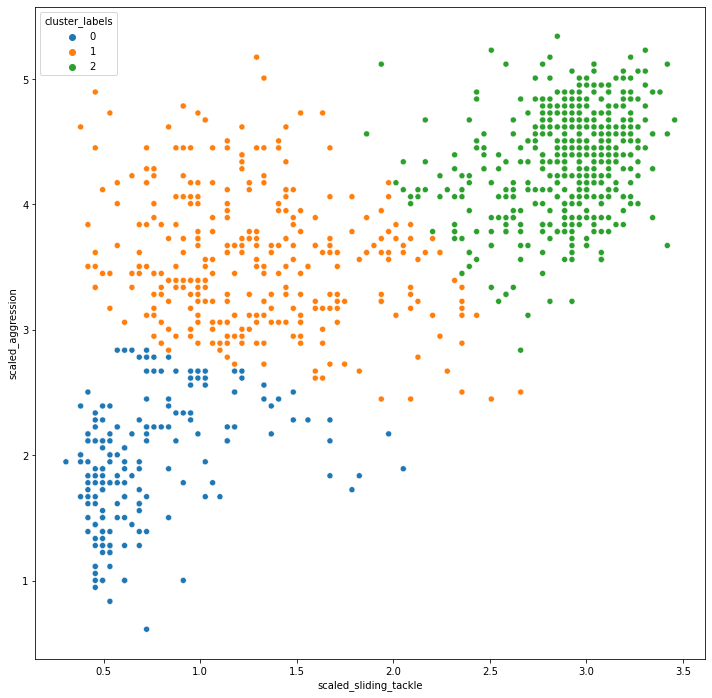

In [18]:
# Plot kmeans clusters
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa, palette='tab10')

## Use 'Elbow method' to determine the best number of clusters

In [19]:
# Declare variables for use
distortions = []
num_clusters = range(2,7)

In [20]:
# Populate distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(fifa[['scaled_sliding_tackle','scaled_aggression']], i)
    distortions.append(distortion)

In [21]:
# Create dataframe of generated data for plotting
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                              'distortions': distortions})

<AxesSubplot:xlabel='num_clusters', ylabel='distortions'>

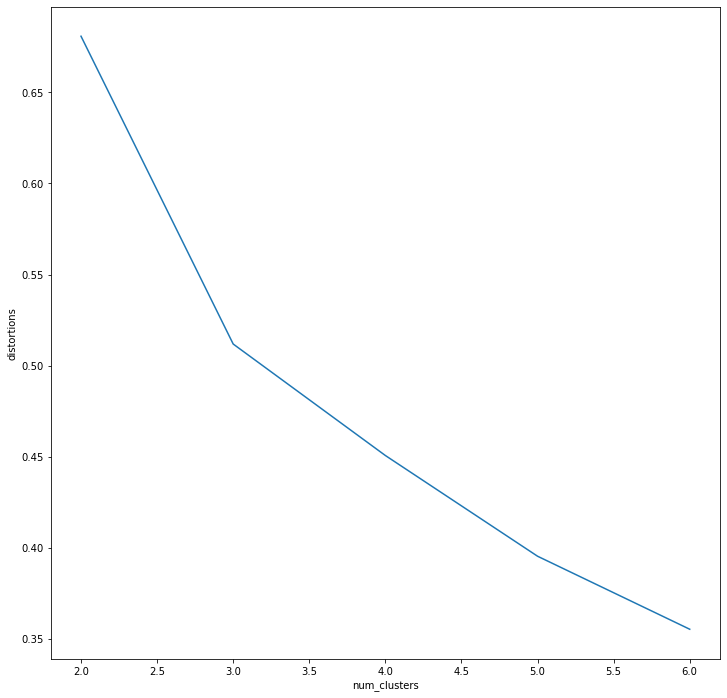

In [22]:
# Plot the data as an "elbow plot"
fig, ax = plt.subplots(figsize=(12,12))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)

Although there is a sharp difference in slope from 4 clusters onward the plot is not unambiguous in determining the best number of clusters to use.

## FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

defending: a number which signifies the defending attributes of a player
physical: a number which signifies the physical attributes of a player
These are typically defense-minded players. We will perform clustering based on these attributes in the data.

In [23]:
# Scale sliding_tackle and aggression columns
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [24]:
# Import random class
from numpy import random

In [25]:
# Set up a random seed in numpy
random.seed([1000,2000])

In [26]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

In [27]:
# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

In [28]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


<AxesSubplot:xlabel='scaled_def', ylabel='scaled_phy'>

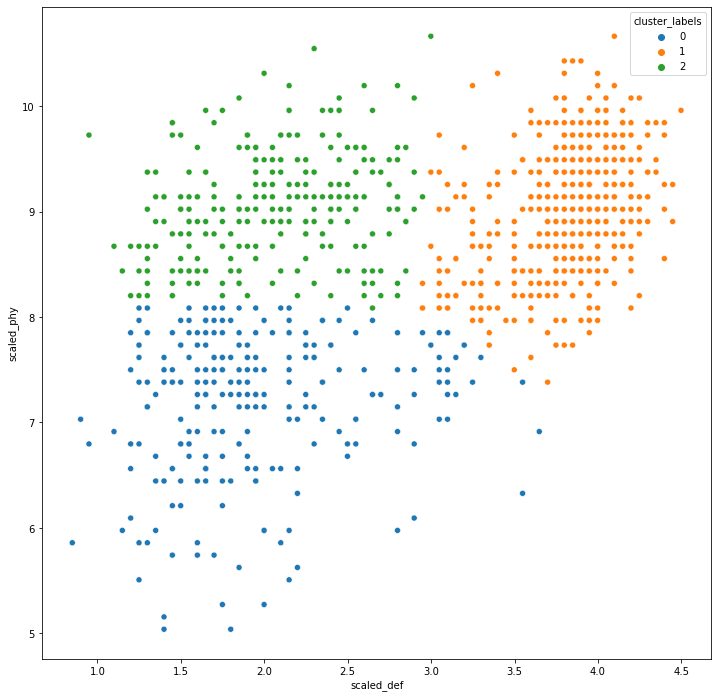

In [29]:
# Create a scatter plot through seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa, palette='tab10')

## Basic checks on clusters

In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. Next we will perform k-means clustering on the data using the scaled values of these three attributes.

In [40]:
# Scale pac, dri,sho columns
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])

In [31]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_pac', 'scaled_dri','scaled_sho']], 3)

In [32]:
# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri','scaled_sho']], cluster_centers)

In [33]:
# Display cluster centers 
print(fifa[['scaled_pac', 'scaled_dri','scaled_sho', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_pac  scaled_dri  scaled_sho
cluster_labels                                    
0                 5.916146    7.999613    5.040766
1                 5.290410    6.318656    3.229186
2                 7.081310    8.710852    5.520627


In [34]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

cluster_labels
0    361
1    182
2    457
Name: ID, dtype: int64


In [35]:
# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    62603.878116
1    63225.274725
2    77297.592998
Name: eur_wage, dtype: float64


The cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

## FIFA 18: What makes a complete player?

The overall level of a player in FIFA 18 is defined by six characteristics: pace (`pac`), shooting (`sho`), passing (`pas`), dribbling (`dri`), defending (`def`), physical (`phy`).

Here is a sample card:
![player_card](./images/fut18-top100-hazard-lg.jpg)

In [37]:
# Create lists of column names
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features = ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

In [43]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

In [44]:
# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.464781    3.677603    7.185542    6.780258     3.96738   
1                 6.684923    5.434618    8.456477    8.517224     2.49411   

                scaled_phy  
cluster_labels              
0                 9.208732  
1                 8.330840  


<AxesSubplot:xlabel='cluster_labels'>

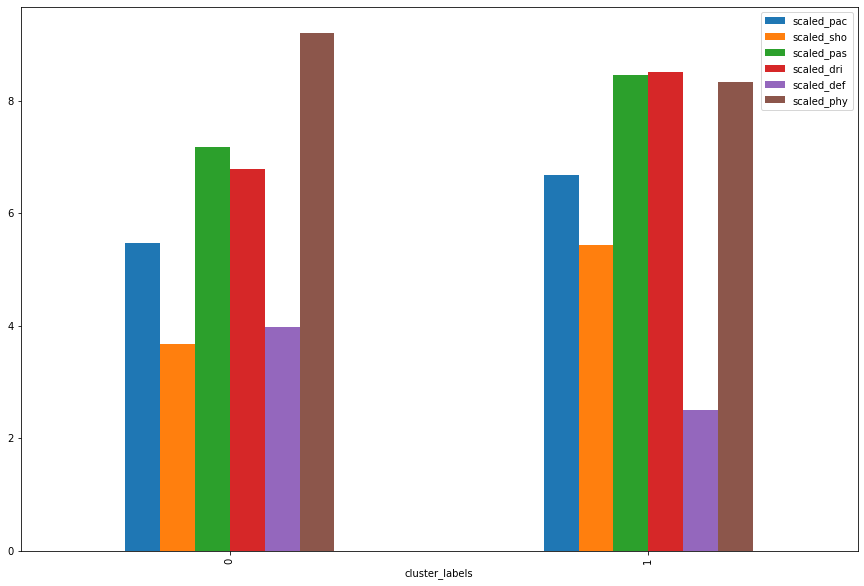

In [50]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar',figsize=(15,10))